In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [6]:
link = "Iris.csv"
Data = pd.read_csv(link)
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# get rid of the Id column - don't need it
Data = Data.drop('Id', axis=1) 

In [8]:
X = Data.iloc[:,0:4]
Y = Data.iloc[:,-1]

In [9]:
Data["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

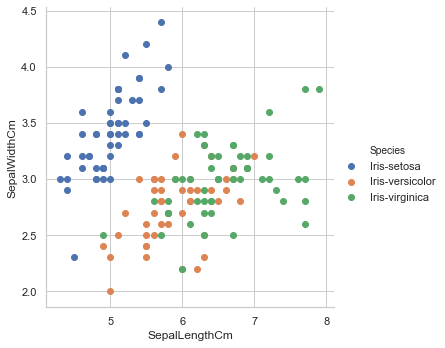

In [10]:
#scatter plot showing species for each sample of SepalLengthCm and SepalWidthCm
sns.FacetGrid(Data, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();

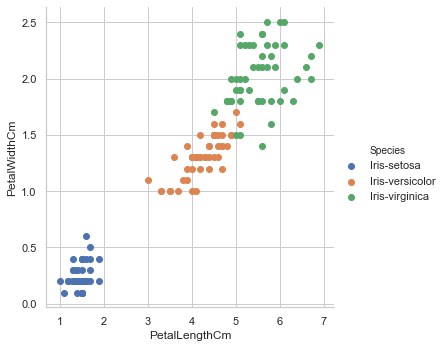

In [11]:
# do same for petals
sns.FacetGrid(Data, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend();

In [12]:
# The data is unbalanced so should do feature scaling,
# Otherwise the larger features will dominate the others in clustering, etc.

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,-1.143017,-1.281972,0.421564,0.659118
70,0.068662,0.337848,0.592162,0.790591
94,-0.294842,-0.819166,0.250967,0.133226
99,-0.173674,-0.587764,0.194102,0.133226
64,-0.294842,-0.356361,-0.090227,0.133226


In [13]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [14]:
# Normalizing the Data 
normalized_df = normalize(X_scaled) 

In [15]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [16]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,1.121912,-0.267905
1,1.080949,0.242703


In [17]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

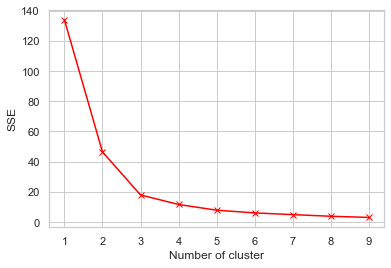

In [18]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-', color='red')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 

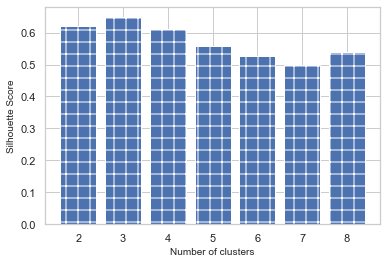

In [20]:
# Plotting a bar graph to compare the results 
k = [2,3,4,5,6,7,8] 
plt.bar(k, silhouette_scores, hatch="+") 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [21]:
X = X.values
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

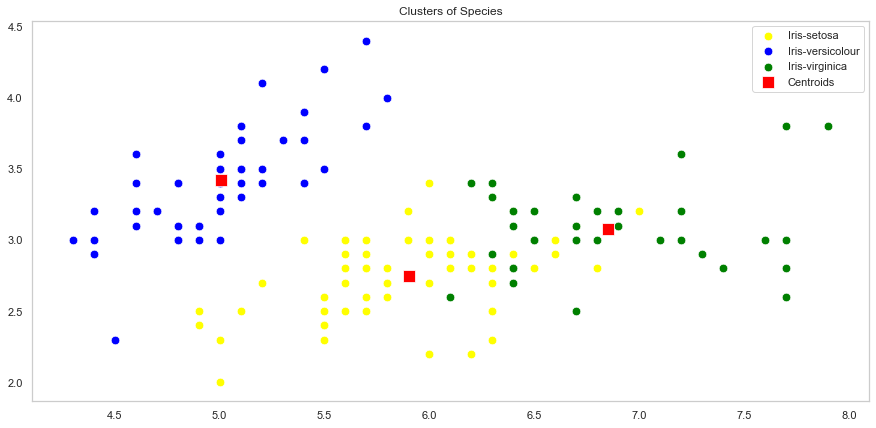

In [22]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Iris-setosa',s=75)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Iris-versicolour',s=75)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Iris-virginica',s=75)

# Plotting the centroids of the clusters
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=150,marker=',')
plt.grid(False)
plt.title('Clusters of Species')
plt.legend()
plt.show()